<a href="https://colab.research.google.com/github/pmewi/Salary_Predictors_Model/blob/main/Salary_Predictors_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Statistical Predictors of Player Salary**
An NBA dataset found off Kaggle includes player contracts signed between 2010-2020. This dataset includes players who were active for the 2020/21 season and includes stats accumulated during season before signing contract.

In [ ]:
import pandas as pd

In [ ]:
##Importing the data
df = pd.read_csv("/content/nba_contracts_history.csv")
df.columns

Index(['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',
       '+/-'],
      dtype='object')

In [ ]:
##Quick check on what the data looks like
df.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


In [ ]:
##Importing packages that will be necessary for proper analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
##Checking data for missing/NaN values
missing_values = df.isnull().sum()
print(missing_values)

NAME              0
CONTRACT_START    0
CONTRACT_END      0
AVG_SALARY        0
AGE               0
GP                0
W                 0
L                 0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
TOV               0
STL               0
BLK               0
PF                0
+/-               0
dtype: int64


In [ ]:
nan_values = df.isna().sum()
print(nan_values)

NAME              0
CONTRACT_START    0
CONTRACT_END      0
AVG_SALARY        0
AGE               0
GP                0
W                 0
L                 0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
TOV               0
STL               0
BLK               0
PF                0
+/-               0
dtype: int64


Going forward, I would like to see if critical NBA stats are good predictors of a player's salary. To start, I will select PTS, FG%, 3P%, FT%, REB, BLK and +/-

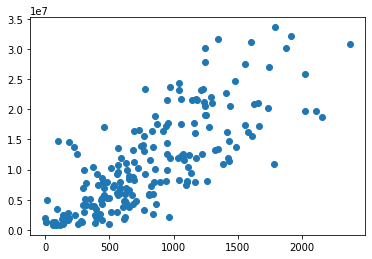

In [ ]:
##Before making the model, let us place each chosen IV on a scatter plot to see if there are any trends with AVG SALARY
import matplotlib.pyplot as plt
plt.scatter(df["PTS"],df["AVG_SALARY"])
plt.show()

Seems already like PTS is a good indicator of player salary.

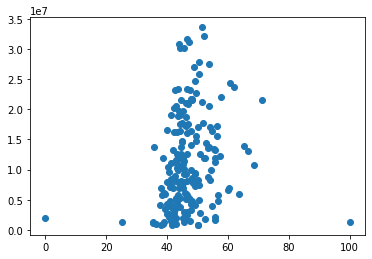

In [ ]:
plt.scatter(df["FG%"],df["AVG_SALARY"])
plt.show()

Seems the FG% doesn't fluctuate much regardless of salary.

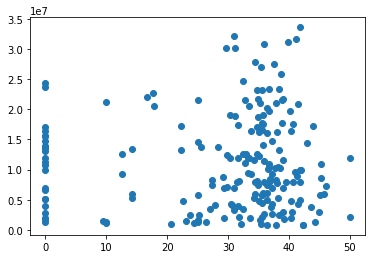

In [ ]:
plt.scatter(df["3P%"],df["AVG_SALARY"])
plt.show()

Seems like there are many active players who attempt very little/no 3 pointers. Slight correlation with salary, but not seemingly a good indicator off the bat.

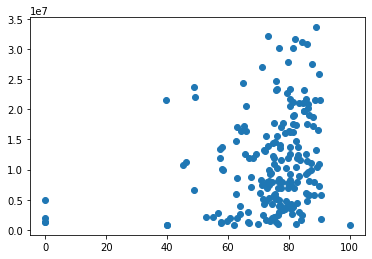

In [ ]:
plt.scatter(df["FT%"],df["AVG_SALARY"])
plt.show()

FT%, surprisingly, seems to fluctuate a bit more than FG% but doesn't seem to have a big impact on salary, either.

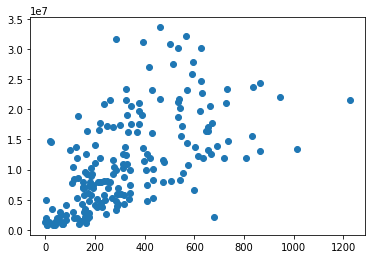

In [ ]:
plt.scatter(df["REB"],df["AVG_SALARY"])
plt.show()

Number of rebounds seem to have a positive correlation with player salary.

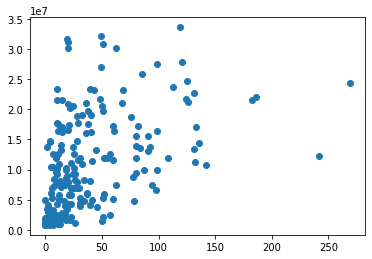

In [ ]:
plt.scatter(df["BLK"],df["AVG_SALARY"])
plt.show()

Blocks seem to also have a positive correlation with salary.

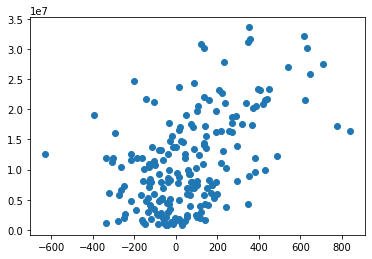

In [ ]:
plt.scatter(df["+/-"],df["AVG_SALARY"])
plt.show()

Let us now make an initial model using all IV's originallly selected.

In [ ]:
##Selecting factors to determine player salary
X = df[["PTS", "FG%", "3P%", "FT%", "REB", "BLK", "+/-"]]
y = df["AVG_SALARY"]

In [ ]:
##Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
##Building the first initial model to predict player salary
model2 = LinearRegression()
model2.fit(X_train, y_train)

In [ ]:
y_pred2 = model2.predict(X_test)
r2 = r2_score(y_test, y_pred2)
print("R2 score: ", r2)

R2 score:  0.6303149396205793


63% of the DV variance can be explained by the model. Not too bad.

In [ ]:
##Quick table comparing Actual AVG SALARY to Predicted Salary
results = pd.DataFrame({"Actual Salary": y_test, "Predicted Salary": y_pred2})
print(results)

     Actual Salary  Predicted Salary
92    1.100000e+07      1.501023e+07
118   1.700000e+07      1.102220e+07
173   1.322170e+07      7.688555e+06
65    1.302356e+06      2.131012e+06
190   1.727500e+07      1.435266e+07
49    5.718000e+06      7.483464e+06
80    5.933334e+06      7.481343e+06
66    4.140721e+06      5.868478e+06
134   9.814860e+05      3.964639e+06
139   1.459139e+07      3.526238e+06
36    1.628404e+07      1.987720e+07
46    1.750000e+07      1.180099e+07
166   2.963205e+06      3.335742e+06
40    3.533333e+06      5.731023e+06
178   4.500000e+06      7.951184e+06
194   1.469367e+07      3.057793e+06
24    8.000000e+06      7.271390e+06
152   3.212458e+07      2.731134e+07
9     8.000000e+06      1.479157e+07
127   8.000000e+06      1.414244e+07
120   1.503704e+06      3.551430e+06
43    2.013214e+07      2.313060e+07
81    1.747321e+07      2.077293e+07
50    2.101801e+07      2.320667e+07
63    5.000000e+06      5.387735e+06
51    2.780080e+07      1.854612e+07
4

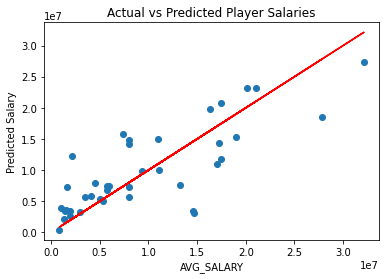

In [ ]:
##Let's quickly visualize the regression line against AVG and Predicted Salaries
plt.scatter(y_test, y_pred2)
plt.xlabel("AVG_SALARY")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Player Salaries")
plt.plot(y_test, y_test, color="red")
plt.show()

Let us create a Random Forest Regression to determine which IV's hold the most weight in terms of determining salary

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=99)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending=False)
print(feature_importances)

  feature  importance
0     PTS    0.643721
6     +/-    0.128598
4     REB    0.075303
5     BLK    0.054182
3     FT%    0.035461
1     FG%    0.033447
2     3P%    0.029289


Using a random forest regression, we can see PTS and +/- were the greeatest predictors of salary. Let's make another linear regression using the top 4 predictors.

In [ ]:
##Selecting new factors to determine player salary
Z = df[["PTS", "+/-","REB", "BLK"]]
w = df["AVG_SALARY"]

In [ ]:
##Split the new data into training and testing
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size=0.2, random_state=99)

In [ ]:
##Building the new model to predict player salary
model3 = LinearRegression()
model3.fit(Z_train, w_train)

In [ ]:
w_pred = model3.predict(Z_test)
r2_2 = r2_score(w_test, w_pred)
print("R2 score: ", r2_2)

R2 score:  0.6010250738502783


Dropped down only to 60% which indicates IV's removed did indeed have little effect on DV. Minimized value will always occur when reducing predictor variables.

In [ ]:
##Table comparing Actual AVG SALARY to Predicted Salary
results2 = pd.DataFrame({'NAME': Z_test.index, 'Actual Salary': w_test, 'Predicted Salary': w_pred})
results2["Difference"] = results2["Actual Salary"] - results2["Predicted Salary"]
results2 = results2.sort_values(by='Difference', ascending=False)
print(results2)

     NAME  Actual Salary  Predicted Salary    Difference
194   194   1.469367e+07      1.842936e+06  1.285073e+07
139   139   1.459139e+07      3.194319e+06  1.139707e+07
51     51   2.780080e+07      1.890036e+07  8.900439e+06
118   118   1.700000e+07      1.046696e+07  6.533043e+06
46     46   1.750000e+07      1.194309e+07  5.556909e+06
173   173   1.322170e+07      7.681503e+06  5.540195e+06
152   152   3.212458e+07      2.704798e+07  5.076602e+06
82     82   1.900000e+07      1.517894e+07  3.821058e+06
190   190   1.727500e+07      1.447072e+07  2.804276e+06
85     85   8.000000e+06      5.818533e+06  2.181467e+06
183   183   1.111019e+07      9.807867e+06  1.302327e+06
24     24   8.000000e+06      7.363856e+06  6.361439e+05
65     65   1.302356e+06      1.183299e+06  1.190570e+05
84     84   5.330000e+06      5.300977e+06  2.902341e+04
53     53   9.320750e+06      9.768646e+06 -4.478965e+05
72     72   1.820148e+06      2.289535e+06 -4.693875e+05
44     44   8.673915e+05      1

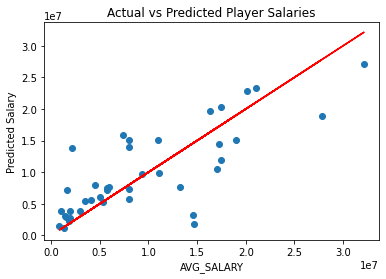

In [ ]:
##Let's visualize the new regression line against AVG and Predicted Salaries
plt.scatter(w_test, w_pred)
plt.xlabel("AVG_SALARY")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Player Salaries")
plt.plot(w_test, w_test, color="red")
plt.show()

In [ ]:
##According to the 2nd model, let's see which players signed the "best" contracts
row_194 = df.loc[194]
row_194["NAME"]

'Brook Lopez'

In [ ]:
row_139 = df.loc[139]
row_139["NAME"]

'Eric Gordon'

In [ ]:
row_51 = df.loc[51]
row_51["NAME"]

'Al Horford'

Brooke Lopez, Eric Gordon and Al Horford all signed contracts equaiting to a much greater evaluation than the predicted model. As predicted, the 2nd model R**2 did drop when predictor variables were reduced, but by a mere 3% points. The random forest regression showed a good determination of the more "influential" stats when predicting player salary. Going forward, it would be ideal to run a few models to determine which factors have the heaviest influence on win percentage. Then, taking these factors into consideration to determine a player's value and salary. Points, as expected, had the greatest prediction influence on salary.